<a href="https://colab.research.google.com/github/AnastasiiaDm/machine-learning/blob/main/DZ_14_CNN/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [24]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [25]:
# Reshape data for CNN: reshape to (28, 28, 1)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [26]:
# Normalize the data to range [0, 1]
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [27]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [46]:
model = models.Sequential()

# First convolutional layer
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Flatten the output of the convolutional layers
model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 55s 56ms/step - accuracy: 0.8822 - loss: 0.4073 - val_accuracy: 0.9842 - val_loss: 0.0514
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 56ms/step - accuracy: 0.9828 - loss: 0.0540 - val_accuracy: 0.9886 - val_loss: 0.0347
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 56ms/step - accuracy: 0.9885 - loss: 0.0361 - val_accuracy: 0.9892 - val_loss: 0.0298
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 56ms/step - accuracy: 0.9919 - loss: 0.0258 - val_accuracy: 0.9876 - val_loss: 0.0382
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 55ms/step - accuracy: 0.9931 - loss: 0.0218 - val_accuracy: 0.9910 - val_loss: 0.0290


In [41]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9883 - loss: 0.0383
Test accuracy: 0.9909999966621399


In [52]:
model_2 = models.Sequential()

model_2.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_2.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_2.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))

model_2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_2.add(layers.Flatten())

model_2.add(layers.Dense(64, activation='relu'))
model_2.add(layers.Dense(10, activation='softmax'))
model_2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 22, 22, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 7744)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │         495,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 552,074 (2.11 MB)

 Trainable params: 552,074 (2.11 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_2.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 315s 334ms/step - accuracy: 0.9040 - loss: 0.3200 - val_accuracy: 0.9838 - val_loss: 0.0473
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 325s 337ms/step - accuracy: 0.9875 - loss: 0.0416 - val_accuracy: 0.9875 - val_loss: 0.0393
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 320s 335ms/step - accuracy: 0.9917 - loss: 0.0264 - val_accuracy: 0.9885 - val_loss: 0.0356
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 318s 330ms/step - accuracy: 0.9945 - loss: 0.0172 - val_accuracy: 0.9907 - val_loss: 0.0318
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 320s 329ms/step - accuracy: 0.9950 - loss: 0.0137 - val_accuracy: 0.9886 - val_loss: 0.0430


In [54]:
test_loss, test_acc = model_2.evaluate(X_test, y_test)
print(f'Test 2 accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.9838 - loss: 0.0585
Test 2 accuracy: 0.9886000156402588


In [55]:
model_3 = models.Sequential()

model_3.add(layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_3.add(layers.MaxPooling2D(pool_size=(2, 2)))

model_3.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D(pool_size=(2, 2)))

model_3.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

model_3.add(layers.Flatten())

model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(10, activation='softmax'))
model_3.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 11, 11, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 3, 3, 128)           │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 116,234 (454.04 KB)

 Trainable params: 116,234 (454.04 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_3.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 34ms/step - accuracy: 0.8665 - loss: 0.4328 - val_accuracy: 0.9819 - val_loss: 0.0561
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9814 - loss: 0.0597 - val_accuracy: 0.9858 - val_loss: 0.0425
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 35ms/step - accuracy: 0.9875 - loss: 0.0400 - val_accuracy: 0.9889 - val_loss: 0.0329
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - accuracy: 0.9908 - loss: 0.0298 - val_accuracy: 0.9883 - val_loss: 0.0323
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 35ms/step - accuracy: 0.9926 - loss: 0.0239 - val_accuracy: 0.9872 - val_loss: 0.0397


In [57]:
test_loss, test_acc = model_3.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9836 - loss: 0.0462
Test accuracy: 0.9872000217437744


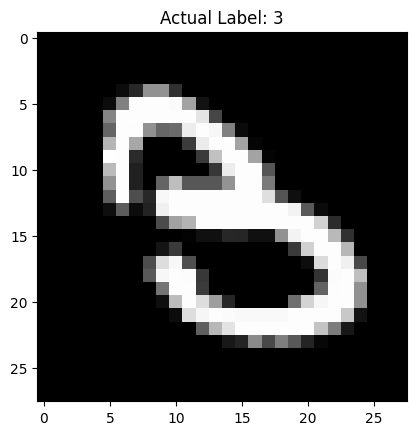

In [44]:
image_index = 18
image = X_test[image_index]
plt.imshow(X_test[image_index].reshape(28, 28), cmap='gray')
plt.title("Actual Label: " + str(np.argmax(y_test[image_index])))
plt.show()

image_reshaped = image.reshape(1, 28, 28, 1)

In [58]:
prediction = model.predict(image_reshaped)
predicted_label = np.argmax(prediction)
print(f"Predicted Digit from Model 1: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Predicted Digit from Model 1: 1


In [59]:
prediction = model_2.predict(image_reshaped)
predicted_label = np.argmax(prediction)
print(f"Predicted Digit from Model 2: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Predicted Digit from Model 2: 5


In [60]:
prediction = model_3.predict(image_reshaped)
predicted_label = np.argmax(prediction)
print(f"Predicted Digit from Model 3: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Predicted Digit from Model 3: 3


### Model Comparison & Review  

| Model  | Params  | Training Time | Test Accuracy | Prediction (Actual: 3) |
|--------|--------|--------------|---------------|------------------------|
| **1**  | 93K    | **55-82s/epoch** | **99.1%**  | ❌ (Predicted: 1)  |
| **2**  | 552K   | **315-325s/epoch** | **98.86%** | ❌ (Predicted: 5)  |
| **3**  | 116K   | **32-43s/epoch**  | **98.72%** | ✅ (Predicted: 3)  |

### **Key Takeaways**  
✅ **Model 1**: Best test accuracy but misclassified.  
✅ **Model 3**: Fastest and correctly classified the test image.  
❌ **Model 2**: Largest, slowest, and still misclassified.  

🚀 **Recommendation:** **Model 3** offers the best balance between speed and accuracy.